In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook



#import cv2
import pims
from PIL import Image

import skimage

In [36]:
inputParameters = pd.read_csv('../_inputParameters.csv',names=['key','value'])
inputParameters.style.set_properties(**{'text-align': 'left'})
#inputParameters

,key,value
0,inputDataFolder,/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
1,outputDataFolder,/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/output
2,movieLength,70
3,allowedMaxNumDetectionsPerFrame,3000
4,framerate_msec,5689
5,ch0_outputDataFolder,output_488
6,ch0_uniqueFilenameString,488nm_0
7,ch0_detectionFilename,Detection3D.mat
8,ch0_trackingFilename,trackedFeatures.mat
9,ch0_trackingCsvFilename,trackedFeatures.csv


In [37]:
def getInputParameter(inputParametersPandas,key):
    #this locates the row, gets the result out of its array form and strips whitespaces away
    return (((inputParametersPandas.loc[inputParametersPandas['key'] == key]).values)[0,1]).strip()

In [77]:
inputDataFolder = getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = getInputParameter(inputParameters,"outputDataFolder")
ch0_outputDataFolder  = getInputParameter(inputParameters,"ch0_outputDataFolder")
ch0_trackingCsvFilename = getInputParameter(inputParameters,"ch0_trackingCsvFilename")
ch1_outputDataFolder  = getInputParameter(inputParameters,"ch1_outputDataFolder")
ch1_trackingCsvFilename = getInputParameter(inputParameters,"ch1_trackingCsvFilename")

ch0_uniqueFilenameString = getInputParameter(inputParameters,"ch0_uniqueFilenameString")
ch1_uniqueFilenameString = getInputParameter(inputParameters,"ch1_uniqueFilenameString")
#trackColor = getInputParameter(inputParameters,"trackColor")
#trackingBildFilename = getInputParameter(inputParameters,"trackingBildFilename")
#framerate_msec = float(getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(getInputParameter(inputParameters,"movieLength"))
#print(trackColor)




In [78]:
print(movieLength)

70


In [ ]:
# get the lattice data frames

In [79]:
from os import listdir
from os.path import isfile, join
import fnmatch

folder = inputDataFolder
print('--- folder searched in: '+folder)

filesOfInterest = []
for file in listdir(inputDataFolder):
    if isfile(join(inputDataFolder, file)) and fnmatch.fnmatch(file, '*'+ch1_uniqueFilenameString+'*.tif'):
        filesOfInterest.append(file)
filesOfInterest=np.sort(filesOfInterest)

print('--- example of files found: '+filesOfInterest[0])
print('--- number of files found: '+str(len(filesOfInterest)))

--- folder searched in: /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
--- example of files found: S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0000_560nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
--- number of files found: 70


/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0010_560nm_0056891msec_0090172992msecAbs_000x_000y_003z_0000t_decon.tif
(201, 704, 600)


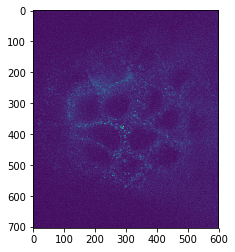

In [90]:
path = inputDataFolder+'/'+filesOfInterest[10]
print(path)
latticeMovieFrame = skimage.external.tifffile.imread(inputDataFolder+'/'+filesOfInterest[10])
print(latticeMovieFrame.shape)
plt.imshow(latticeMovieFrame[50])

In [81]:
center=np.array([224.29615185,362.37867407,45.60376889])
centerFirstFrame=np.array([ 230.4449 ,  360.2939 ,   46.78298])
center11=np.array([ 225.5096 ,  362.1427 ,   44.99918])
print(center.astype(int))

[224 362  45]


In [82]:
def cropLatticeFrame(frame,center,margin):
    zMax,yMax,xMax = frame.shape
    startx = max(center[0]-margin[0],0)
    endx = min(center[0]+margin[0],xMax)
    
    starty = max(center[1]-margin[1],0)
    endy = min(center[1]+margin[1],yMax)
    
    startz = max(center[2]-margin[2],0)
    endz = min(center[2]+margin[2],xMax)
    
    return frame[startz:endz,starty:endy,startx:endx]

In [76]:
cropped = cropLatticeFrame(latticeMovieFrame,center11.astype(int),[100,100,100])
skimage.external.tifffile.imsave('./cropped_100.tif', cropped)

cropped = cropLatticeFrame(latticeMovieFrame,center11.astype(int),[20,20,20])
skimage.external.tifffile.imsave('./cropped_20.tif', cropped)
print(cropped.shape)

cropped = cropLatticeFrame(latticeMovieFrame,center11.astype(int),[5,5,5])
skimage.external.tifffile.imsave('./cropped_5.tif', cropped)



skimage.external.tifffile.imsave('./cropped_3Frames.tif', np.array([cropped,cropped,cropped]))

(40, 40, 40)


In [ ]:
# display a whole image series

In [91]:


for i in range(0,movieLength):
    print(i)
    path = inputDataFolder+'/'+filesOfInterest[i]
    print(path)
    
#    center=np.array([ 214.98012571 , 281.93155857 ,  90.67524957])
#    center = np.array([459,513,92])
    center = np.array([214, 281,  90])
    latticeMovieFrame = skimage.external.tifffile.imread(path)
    cropped = cropLatticeFrame(latticeMovieFrame,center.astype(int),[20,20,20])
    skimage.external.tifffile.imsave('./tmp/cropped_560_pm20px_maxAmpl_'+str(i)+'.tif', cropped)
    

0
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0000_560nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
1
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0001_560nm_0005689msec_0090121790msecAbs_000x_000y_003z_0000t_decon.tif
2
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0002_560nm_0011378msec_0090127479msecAbs_000x_000y_003z_0000t_decon.tif
3
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical

29
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0029_560nm_0164983msec_0090281084msecAbs_000x_000y_003z_0000t_decon.tif
30
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0030_560nm_0170672msec_0090286773msecAbs_000x_000y_003z_0000t_decon.tif
31
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0031_560nm_0176362msec_0090292463msecAbs_000x_000y_003z_0000t_decon.tif
32
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_ap

58
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0058_560nm_0329967msec_0090446068msecAbs_000x_000y_003z_0000t_decon.tif
59
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0059_560nm_0335656msec_0090451757msecAbs_000x_000y_003z_0000t_decon.tif
60
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0060_560nm_0341345msec_0090457446msecAbs_000x_000y_003z_0000t_decon.tif
61
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_ap

In [89]:
cropped.shape

(40, 40, 40)

In [ ]:
cropped = cropLatticeFrame(latticeMovieFrame,center11.astype(int),[5,5,5])
skimage.external.tifffile.imsave('./cropped_5.tif', cropped)